<a href="https://colab.research.google.com/github/MarcoM95/MLPNS2021/blob/main/latent_16_16_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Dropout,Flatten,Conv2DTranspose
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, train_labels), (X_test, test_labels) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32') / 255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test  = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)
print('Train images shape:',X_train.shape)
print('Test images shape:',X_test.shape)

print('(max,min)=', X_train.min(), X_train.max())

170508288/170498071 [==============================] - 6s 0us/step
Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)
(max,min)= 0.0 1.0


# 16x16x2

In [4]:
input_img = Input(shape=(32,32,3))

#Encoder
x = Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D(2, padding='same')(x)

x = Conv2D(2, 3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# Bottleneck
encoded = x

#Decoder
x = Conv2DTranspose(32, 3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2DTranspose(32, 3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)

decoded = Conv2DTranspose(3, 1, activation='sigmoid', padding='same')(x)

autoencoder_model_16_16_2 = Model(input_img, decoded)
autoencoder_model_16_16_2.compile(optimizer='adam', loss='mse')

autoencoder_model_16_16_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 2)         578       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 2)         8         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 32)        608   

In [5]:
encoder_model_16_16_2 = Model(input_img, encoded)
encoder_model_16_16_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 2)         578       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 2)         8         
Total params: 1,610
Trainable params: 1,542
Non-trainable params: 68
________________________________________________________

In [6]:
autoencoder_model_16_16_2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [7]:
from keras.callbacks import EarlyStopping

er = EarlyStopping(monitor='val_loss', patience=10)
callbacks = [er]

history_AE_16_16_2 = autoencoder_model_16_16_2.fit(X_train, X_train,
                    epochs=30,
                    batch_size=512,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    callbacks=callbacks)

Epoch 1/30
98/98 [==============================] - 40s 96ms/step - loss: 0.0234 - accuracy: 0.4261 - val_loss: 0.0483 - val_accuracy: 0.3842
Epoch 2/30
98/98 [==============================] - 8s 87ms/step - loss: 0.0079 - accuracy: 0.5601 - val_loss: 0.0424 - val_accuracy: 0.2771
Epoch 3/30
98/98 [==============================] - 8s 86ms/step - loss: 0.0053 - accuracy: 0.6252 - val_loss: 0.0303 - val_accuracy: 0.2957
Epoch 4/30
98/98 [==============================] - 8s 86ms/step - loss: 0.0043 - accuracy: 0.6463 - val_loss: 0.0144 - val_accuracy: 0.3840
Epoch 5/30
98/98 [==============================] - 8s 86ms/step - loss: 0.0037 - accuracy: 0.6533 - val_loss: 0.0076 - val_accuracy: 0.5185
Epoch 6/30
98/98 [==============================] - 9s 87ms/step - loss: 0.0034 - accuracy: 0.6585 - val_loss: 0.0047 - val_accuracy: 0.5950
Epoch 7/30
98/98 [==============================] - 8s 87ms/step - loss: 0.0031 - accuracy: 0.6626 - val_loss: 0.0037 - val_accuracy: 0.6420
Epoch 8/30
9

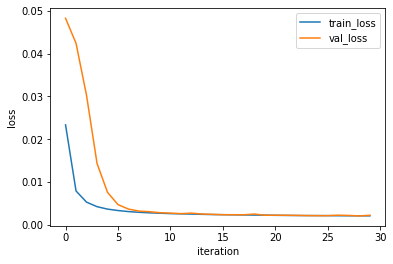

In [8]:
plt.plot(np.array(history_AE_16_16_2.history['loss']), label="train_loss")
plt.plot(np.array(history_AE_16_16_2.history['val_loss']), label="val_loss")
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend()
#plt.savefig('loss_AE.png')
#plt.yscale('log')
#plt.xscale('log')

In [9]:
scores = autoencoder_model_16_16_2.evaluate(X_test,X_test,verbose=1)
print("Test Loss",scores[0])
print("Test Accuracy",scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0022 - accuracy: 0.6902
Test Loss 0.0022490080446004868
Test Accuracy 0.690230667591095


In [10]:
from numpy import asarray
from numpy import savetxt

loss_AE_16_16_2 = asarray(history_AE_16_16_2.history['loss'])
# save to csv file
savetxt('loss_AE_16_16_2.csv', loss_AE_16_16_2, delimiter=',')

val_loss_AE_16_16_2 = asarray(history_AE_16_16_2.history['val_loss'])
# save to csv file
savetxt('val_loss_AE_16_16_2.csv', val_loss_AE_16_16_2, delimiter=',')

In [11]:
reconstructed_test_images_16_16_2 = autoencoder_model_16_16_2.predict(X_test)
print(reconstructed_test_images_16_16_2.shape)

(10000, 32, 32, 3)


In [12]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [13]:
print(mse(X_test[0],reconstructed_test_images_16_16_2[0]))
print(mse(X_test[10],reconstructed_test_images_16_16_2[10]))
print(mse(X_test[100],reconstructed_test_images_16_16_2[100]))

0.007719712283619606
0.002886155522734546
0.003706193774140938


In [14]:
mse_vec_16_16_2 = np.zeros(X_test.shape[0])
for x in range(X_test.shape[0]):
  mse_vec_16_16_2[x] = mse(X_test[x],reconstructed_test_images_16_16_2[x])

import numpy as np

print(mse_vec_16_16_2.shape)
print(np.mean(mse_vec_16_16_2))

(10000,)
0.006747023089929001


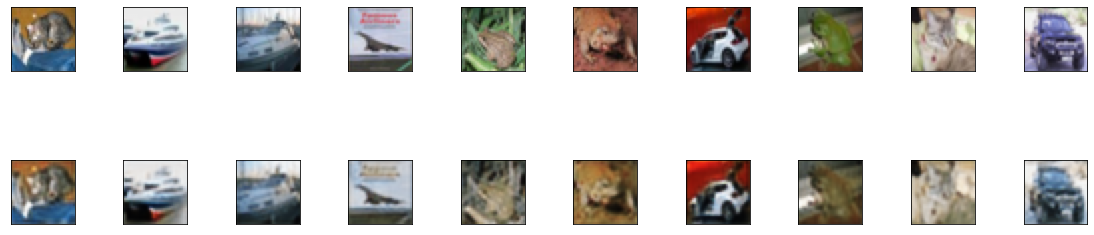

In [15]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(reconstructed_test_images_16_16_2[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
def classifier_conv(inp):
    input = Input((inp.shape[1], inp.shape[2], inp.shape[3]))
    
    #x = Conv2D(32, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(input)
    x = Conv2D(64, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    #x = Conv2D(64, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = Conv2D(128, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    x = Dense(512, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.35)(x)
    x = Dense(100, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)
    return Model(input, output)

In [17]:
'''
def classifier_conv(inp):
    input = Input((inp.shape[1], inp.shape[2], inp.shape[3]))
    
    x = UpSampling2D((2,2))(input)
    x = Conv2D(64, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    #x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    #x = UpSampling2D((2,2))(x)
    x = Conv2D(128, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    x = Conv2D(128, 3, kernel_initializer='he_uniform', padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    x = Dense(512, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.35)(x)
    x = Dense(100, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)
    return Model(input, output)
'''

'\ndef classifier_conv(inp):\n    input = Input((inp.shape[1], inp.shape[2], inp.shape[3]))\n    \n    x = UpSampling2D((2,2))(input)\n    x = Conv2D(64, 3, kernel_initializer=\'he_uniform\', padding="same",activation=\'relu\')(x)\n    x = BatchNormalization()(x)\n    #x = MaxPooling2D(2)(x)\n    x = Dropout(0.5)(x)\n    \n    #x = UpSampling2D((2,2))(x)\n    x = Conv2D(128, 3, kernel_initializer=\'he_uniform\', padding="same",activation=\'relu\')(x)\n    x = BatchNormalization()(x)\n    x = MaxPooling2D(2)(x)\n    x = Dropout(0.5)(x)\n    \n    x = Conv2D(128, 3, kernel_initializer=\'he_uniform\', padding="same",activation=\'relu\')(x)\n    x = BatchNormalization()(x)\n    x = MaxPooling2D(2)(x)\n    x = Dropout(0.5)(x)\n    \n    x = Flatten()(x)\n    x = Dense(512, kernel_initializer=\'he_uniform\', activation=\'relu\')(x)\n    x = Dropout(0.35)(x)\n    x = Dense(100, kernel_initializer=\'he_uniform\', activation=\'relu\')(x)\n    x = Dropout(0.5)(x)\n    output = Dense(10, activati

In [18]:
encoded_imgs_train_16_16_2 = encoder_model_16_16_2.predict(X_train)
print(encoded_imgs_train_16_16_2.shape)

(50000, 16, 16, 2)


In [19]:
encoded_imgs_test_16_16_2 = encoder_model_16_16_2.predict(X_test)
print(encoded_imgs_test_16_16_2.shape)

(10000, 16, 16, 2)


In [20]:
def compareinout_encoded(i, outim, testimg, initialshape=(32,32,3)):
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(131) 
  ax.imshow(X_test[i], cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(132)
  plt.imshow(encoded_imgs_test_16_16_2[0].reshape(64,8).T)
  plt.yticks([])
  ax = fig.add_subplot(133) 
  ax.imshow(reconstructed_test_images_16_16_2[i], cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

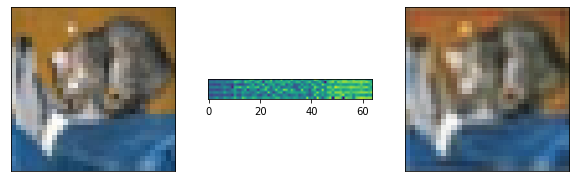

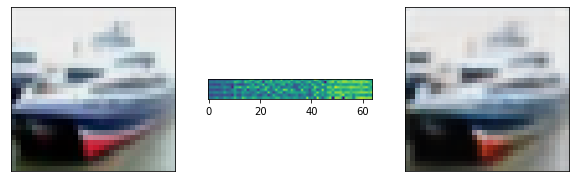

In [21]:
for i in range(2):
  compareinout_encoded(i, reconstructed_test_images_16_16_2, X_test)

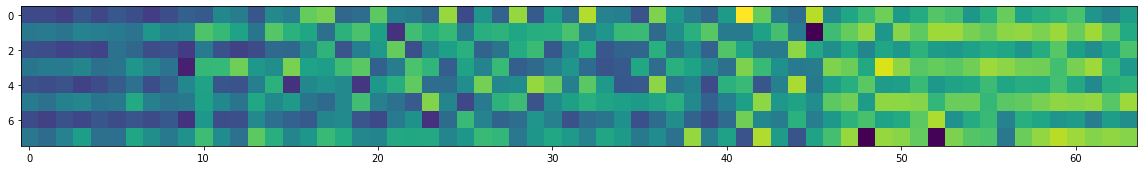

In [22]:
plt.figure(figsize=(20, 8))
plt.imshow(encoded_imgs_test_16_16_2[0].reshape(64,8).T);

In [23]:
classifier_16_16_2 = classifier_conv(encoded_imgs_train_16_16_2)
classifier_16_16_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16, 16, 2)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1216      
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 128)         512 

In [24]:
import keras
from tensorflow.keras.optimizers import Adam # - Works
opt = Adam(learning_rate=0.001)

classifier_16_16_2.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])  # binary_crossentropy

In [25]:
from keras.utils import np_utils

train_labels_categorical = keras.utils.np_utils.to_categorical(train_labels, 10)
test_labels_categorical  = keras.utils.np_utils.to_categorical(test_labels, 10)

print(train_labels_categorical.shape)
print(test_labels_categorical.shape)

(50000, 10)
(10000, 10)


In [26]:
history_class_16_16_2 = classifier_16_16_2.fit(encoded_imgs_train_16_16_2, train_labels_categorical, batch_size=64, epochs=30,
                    validation_data=(encoded_imgs_test_16_16_2, test_labels_categorical))

Epoch 1/30
782/782 [==============================] - 9s 10ms/step - loss: 2.1197 - accuracy: 0.2142 - val_loss: 1.6713 - val_accuracy: 0.3781
Epoch 2/30
782/782 [==============================] - 7s 9ms/step - loss: 1.7525 - accuracy: 0.3365 - val_loss: 1.4588 - val_accuracy: 0.4612
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 1.5985 - accuracy: 0.4164 - val_loss: 1.3557 - val_accuracy: 0.5094
Epoch 4/30
782/782 [==============================] - 7s 9ms/step - loss: 1.4718 - accuracy: 0.4732 - val_loss: 1.2679 - val_accuracy: 0.5610
Epoch 5/30
782/782 [==============================] - 7s 9ms/step - loss: 1.3881 - accuracy: 0.5096 - val_loss: 1.1540 - val_accuracy: 0.5901
Epoch 6/30
782/782 [==============================] - 7s 9ms/step - loss: 1.3161 - accuracy: 0.5384 - val_loss: 1.1357 - val_accuracy: 0.6038
Epoch 7/30
782/782 [==============================] - 7s 9ms/step - loss: 1.2635 - accuracy: 0.5598 - val_loss: 1.0635 - val_accuracy: 0.6221
Epoch

Text(0.5, 1.0, 'Accuracy Curves')

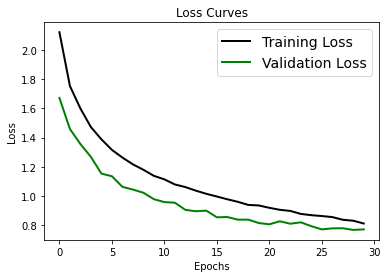

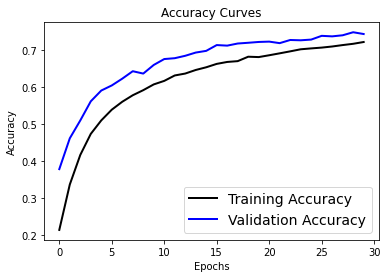

In [27]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history_class_16_16_2.history['loss'], 'black', linewidth=2.0)
plt.plot(history_class_16_16_2.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_class_16_16_2.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_class_16_16_2.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [28]:
loss_class_16_16_2 = asarray(history_class_16_16_2.history['loss'])
# save to csv file
savetxt('loss_class_16_16_2.csv', loss_class_16_16_2, delimiter=',')

val_loss_class_16_16_2 = asarray(history_class_16_16_2.history['val_loss'])
# save to csv file
savetxt('val_loss_class_16_16_2.csv', val_loss_class_16_16_2, delimiter=',')

In [29]:
accuracy_class_16_16_2 = asarray(history_class_16_16_2.history['accuracy'])
# save to csv file
savetxt('accuracy_class_16_16_2.csv', accuracy_class_16_16_2, delimiter=',')

val_accuracy_class_16_16_2 = asarray(history_class_16_16_2.history['val_accuracy'])
# save to csv file
savetxt('val_accuracy_class_16_16_2.csv', val_accuracy_class_16_16_2, delimiter=',')

In [30]:
scores = classifier_16_16_2.evaluate(encoded_imgs_test_16_16_2,test_labels_categorical,verbose=1)
print("Test Loss",scores[0])
print("Test Accuracy",scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7728 - accuracy: 0.7425
Test Loss 0.7728327512741089
Test Accuracy 0.7425000071525574
